In [36]:
from knn_model import *
pd.set_option('display.max_columns', None)
%matplotlib inline

In [67]:
    df = pd.read_csv('../data/new_olympics_merged.csv', sep = '|',lineterminator='\n')
    df_clean = prep_for_knn(df)
    test,train = train_test_split(df_clean,2016)
    #get weather data
    keys = ['Global_sum_FIPS:53031 FIPS:53009.csv','Global_sum_FIPS:53045 FIPS:53027.csv']
    df_weather = import_weather(keys)
    df_weather_dist = df_weather[['LATITUDE','LONGITUDE','name']].drop_duplicates().reset_index()
    #add feature columns

In [68]:
test

,Date,last_year,year,condition|snow,condition|trail,condition|bugs,condition|road,Anderson Lake State Park,Anderson Point,Appleton Pass,Aurora Creek,Baldy,Banner Forest,Barnes Creek,Big Cedar Tree - Quinault,Big Creek,Big Tree Trail,Blue Mountain - Deer Park Snowshoe,Bogachiel Peak,Bogachiel River,Boulder Lake (Olympics),Buckhorn Mountain,Burfoot Park,Cape Alava,Cape Alava Loop (Ozette Triangle),Cape Flattery,Capitol State Forest - Capitol Peak,Capitol State Forest - McLane Creek,Capitol State Forest - Mount Molly,Capitol State Forest - Rock Candy Mountain,Capitol State Forest - Sherman Creek Loop,Cascade Rock,Church Creek,Clear Creek Trail,Colonel Bob Trail - Colonel Bob Peak,Constance Pass,Copper Creek,Cub Peak,Deadfall,Deer Park to Maiden Peak,Deer Ridge,Dirty Face Ridge,Dodger Point,Dosewallips River Road,Dosewallips State Park - Steam Donkey Trail,Dry Creek,Duckabush River,Dungeness Spit,Eagle Point Snowshoe,Elbo Creek,Elk Lakes,Elk Mountain to Maiden Peak,Elwha River and Geyser Valley,Elwha River and Lillian River,Elwha To Hurricane Hill,Fallsview Canyon (Falls View),Fletcher Canyon,Fort Flagler State Park,Foulweather Bluff Preserve Trail,Gibbs Lake,Gladys Divide,Glines Canyon Overlook Trail,Gold Mountain,Grand Ridge,Grand Valley,Grand Valley via Grand Pass Trail,Graves Creek,Green Mountain - Gold Creek Trail,Green Mountain - Wildcat Trail,Griff Creek,Guillemot Cove,Hall of Mosses,Hansville Greenway,Happy Lake Ridge,Harstine Island State Park,Heart O' the Forest,Heather Creek Trail via Upper Dungeness River,Heather Park,High Divide - Seven Lakes Basin Loop,Hoh River Trail to Blue Glacier,Hoh River Trail to Five Mile Island,Home Lake,Hurricane Hill,Hurricane Ridge Snowshoe,Illahee Forest Preserve,Indian Island County Park,Jefferson Ridge,Kalaloch - Browns Point,Kalaloch Creek Nature Trail,Kestner Homestead,Klahhane Ridge,Klahhane Ridge Snowshoe,Kloshe Nanitch,Kopachuck State Park Trail,Lake Angeles,Lake Constance,Lake of the Angels,Lena Lake,Lena Lake - Valley of Silent Men Snowshoe,Lightning Peak,Lillian Ridge,Lillian River,Little Quilcene River,Lower Big Quilcene River,Lower Dungeness River,Lower Gray Wolf River,Lower Pete's Creek,Lower South Fork Skokomish River,Marmot Pass - Upper Big Quilcene,Marmot Pass via Upper Dungeness River Trail,Mary E. Theler Wetlands Nature Preserve,Marymere Falls,McCormick Forest Park,Mildred Lakes,Miller Peninsula-Thompson Spit,Millersylvania State Park,Mima Mounds,Mink Lake,Mink Lake to Little Divide,Mount Angeles,Mount Angeles Snowshoe,Mount Ellinor,Mount Jupiter,Mount Muller,Mount Rose,Mount Storm King,Mount Townsend,Mount Townsend - Silver Lakes Traverse,Mount Townsend Snowshoe,Mount Walker,Mount Zion,Murhut Falls,Ned Hill,Newberry Hill Heritage Park,North Coast Route,North Fork Quinault River and Halfway House,North Fork Skokomish River,North Fork Skokomish River and Flapjack Lakes,North Fork Sol Duc River,Notch Pass,Olympic Hot Springs,PJ Lake,Peabody Creek Trail,Penrose Point State Park,Pete's Creek - Colonel Bob Peak,Priest Point Park,Pyramid Mountain / Pyramid Peak,Queets Campground Loop,Queets River,Quillayute River Slough,Quinault National Recreation Trails,Quinault River-Pony Bridge-Enchanted Valley,Rain Shadow Loop,Ranger Hole - Interrorem Nature Trail,Royal Basin - Royal Lake,Ruby Beach,Second Beach,Shi Shi Beach and Point of the Arches,Silver Lakes,Six Ridge,Slab Camp Creek and Gray Wolf River,Smokey Bottom (West Lake Mills),Snider-Jackson Traverse,Sol Duc Falls,South Coast Wilderness Trail - Toleak Point,South Fork Hoh River - Big Flat,Spider Lake,Spoon Creek Falls,Spruce Railroad Trail,Staircase Rapids,Striped Peak,Sunnybrook Meadows,Switchback,The Brothers,Third Beach,Three Lakes,Tubal Cain Mine,Tubal Cain Mine to Buckhorn Lake,Tumwater Falls Park,Tunnel Creek,Tunnel Creek - Dosewallips Trailhead,Twanoh State Park,Upper Dungeness River,Upper Lena Lake,Upper South Fork Skokomish River,Valhalla Peak,Wagonwheel Lake,Watershed Park,Welch Peaks,West Elwha,West Fork Dosewallips

In [69]:
conditions = ['condition|snow', 'condition|trail','condition|bugs','condition|road']
for condition in conditions:
    df = pd.read_csv('../data/new_olympics_merged.csv', sep = '|',lineterminator='\n')
    df_clean = prep_for_knn(df)
    test,train = train_test_split(df_clean,2016)
    #get weather data
    keys = ['Global_sum_FIPS:53031 FIPS:53009.csv','Global_sum_FIPS:53045 FIPS:53027.csv']
    df_weather = import_weather(keys)
    df_weather_dist = df_weather[['LATITUDE','LONGITUDE','name']].drop_duplicates().reset_index()
    
    add_cols(test,train, df_weather_dist,condition)
    #merge and save full df
    df_test = merge_weather_trails(df_weather,test)
    df_train = merge_weather_trails(df_weather,train)
    train_X,train_y,test_X,test_y = get_knn_inputs(df_test,df_train,condition)
    model,pred = make_forest(train_X,train_y,test_X,test_y)
    
    y_true = test_y
    y_pred = pred[:,1]

    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    area_under_curve = auc(fpr, tpr)
    print (condition, area_under_curve)

#     # method I: plt
#     fig, ax = plt.subplots()
#     plt.title(f'Receiver Operating Characteristic - {condition}')
#     ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

#     ax.legend(loc = 'lower right')
#     ax.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()
    test.drop([f'neighbors_average {condition}'],axis=1)
    train.drop([f'neighbors_average {condition}'],axis=1)

/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/projects/Trail_Report/src/knn_model.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'neighbors_average {condition}'] = averages
/Users/ashley/projects/Trail_Report/src/Cleaning/Merge_Weather.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

condition|snow 1.0


/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/projects/Trail_Report/src/knn_model.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'neighbors_average {condition}'] = averages
/Users/ashley/projects/Trail_Report/src/Cleaning/Merge_Weather.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

condition|trail 1.0


/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/projects/Trail_Report/src/knn_model.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'neighbors_average {condition}'] = averages
/Users/ashley/projects/Trail_Report/src/Cleaning/Merge_Weather.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

condition|bugs 0.999918082888


/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/projects/Trail_Report/src/knn_model.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'neighbors_average {condition}'] = averages
/Users/ashley/projects/Trail_Report/src/Cleaning/Merge_Weather.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

condition|road 1.0


In [21]:
model,pred = make_forest(train_X,train_y,test_X,test_y)
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

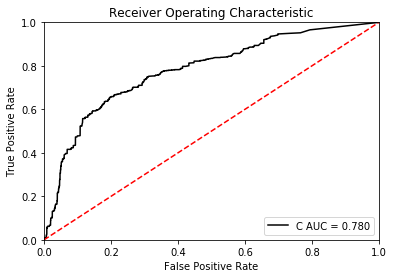

In [22]:
y_true = test_y
y_pred = pred[:,1]

fpr, tpr, threshold = roc_curve(y_true, y_pred)
area_under_curve = auc(fpr, tpr)

# method I: plt
fig, ax = plt.subplots()
plt.title('Receiver Operating Characteristic')
ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

ax.legend(loc = 'lower right')
ax.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
feature_values = {}
for i in range(len(model.feature_importances_)):
   feature_values[test_X.columns[i]] = model.feature_importances_[i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

[('neighbors_average', 0.30159563381944338),
 ('month', 0.23499719875040045),
 ('highest_point', 0.028135668549925365),
 ('elevation_gain', 0.023615252472676578),
 ('long', 0.018999243320777657),
 ('total_distance', 0.017861115134421599),
 ('lat', 0.017653445156102624),
 ('stars', 0.01712456075486795),
 ('numReports', 0.017115053311486404),
 ('DP01', 0.015899374022125226),
 ('number_votes', 0.015716333116401856),
 ('DP10', 0.013637146292816866),
 ('PRCP', 0.012218047784845363),
 ('EMXP', 0.010290690274848359),
 ('TMAX', 0.00895838773143285),
 ('HDSD', 0.0087387047871515973),
 ('HTDD', 0.0087193237195635192),
 ('DX70', 0.0080000027392653581),
 ('EMXT', 0.0067508993280005038),
 ('TAVG', 0.0061342448518979771),
 ('Ridges/passes', 0.0053079302337229661),
 ('FZF0', 0.0051620654885430692),
 ('Mountain views', 0.0051195780999764165),
 ('Wildflowers/Meadows', 0.0049216549208733361),
 ('Lakes', 0.0049154268071376879),
 ('Rivers', 0.0048925814389208537),
 ('Established campsites', 0.004694102299

In [30]:
conditions = ['condition|snow', 'condition|trail','condition|bugs',
    'condition|road']

In [31]:
conditon = 'condition|snow'

In [33]:
conditions.remove(conditon)

In [51]:
type(conditions)

list

In [52]:
more = ['test','this','one']
type(more+conditions)

list